In [1]:
from __future__ import print_function
import os
data_path = ['./']

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [2]:
import pandas as pd
import numpy as np

In [3]:
# data loading

In [4]:
filepath = os.sep.join(data_path + ['CarPrice_Assignment.csv'])
data = pd.read_csv(filepath, sep=',')
print(data.shape)

(205, 26)


In [5]:
print(data.columns)
data

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [6]:
# data preprocessing

In [7]:
# Drop car_ID column since it is not a feature column
data = data.drop('car_ID', axis=1)
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [8]:
# Parse Brand name from CarName column and drop original CarName column
data['BrandName'] = data['CarName'].apply(lambda x: x.split()[0])
data = data.drop('CarName', axis=1)
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,BrandName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [9]:
data.dtypes.value_counts()

object     10
float64     8
int64       7
dtype: int64

In [10]:
# One-hot Encoding

In [11]:
# Select the object (string) columns
mask = data.dtypes == object
categorical_cols = data.columns[mask]
categorical_cols

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem',
       'BrandName'],
      dtype='object')

In [12]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]
print(float_cols)

skew_limit = 0.75
skew_vals = data[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))
print(skew_cols)

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'boreratio',
       'stroke', 'compressionratio', 'price'],
      dtype='object')
                      Skew
compressionratio  2.610862
price             1.777678
wheelbase         1.050214
carwidth          0.904003


In [13]:
# Mute the setting wtih a copy warnings
pd.options.mode.chained_assignment = None

# Apply log (log1p) to columns
for col in skew_cols.index.tolist():
    if col == "price":
        continue
    data[col] = np.log1p(data[col])

In [14]:
# Determine how many extra columns would be created
num_ohc_cols = (data[categorical_cols]
                .apply(lambda x: x.nunique())
                .sort_values(ascending=False))
# Every categorical columns have at least 2 unique values
num_ohc_cols

BrandName         28
fuelsystem         8
enginetype         7
cylindernumber     7
carbody            5
drivewheel         3
fueltype           2
aspiration         2
doornumber         2
enginelocation     2
dtype: int64

In [15]:
# Copy of the data
data_ohc = data.copy()

# The encoders
le = LabelEncoder()
ohc = OneHotEncoder()

for col in num_ohc_cols.index:
    
    # Integer encode the string categories
    dat = le.fit_transform(data_ohc[col]).astype(int)
    
    # Remove the original column from the dataframe
    data_ohc = data_ohc.drop(col, axis=1)

    # One hot encode the data--this returns a sparse array
    new_dat = ohc.fit_transform(dat.reshape(-1,1))

    # Create unique column names
    n_cols = new_dat.shape[1]
    col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]

    # Create the new dataframe
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index, 
                          columns=col_names)

    # Append the new data to the dataframe
    data_ohc = pd.concat([data_ohc, new_df], axis=1)

In [16]:
print(data_ohc.shape)
data_ohc

(205, 81)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,drivewheel_1,drivewheel_2,fueltype_0,fueltype_1,aspiration_0,aspiration_1,doornumber_0,doornumber_1,enginelocation_0,enginelocation_1
0,3,4.495355,168.8,4.175925,48.8,2548,130,3.47,2.68,2.302585,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1,3,4.495355,168.8,4.175925,48.8,2548,130,3.47,2.68,2.302585,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1,4.559126,171.2,4.197202,52.4,2823,152,2.68,3.47,2.302585,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
3,2,4.613138,176.6,4.207673,54.3,2337,109,3.19,3.40,2.397895,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,2,4.609162,176.6,4.210645,54.3,2824,136,3.19,3.40,2.197225,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.701389,188.8,4.247066,55.5,2952,141,3.78,3.15,2.351375,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
201,-1,4.701389,188.8,4.245634,55.5,3049,141,3.78,3.15,2.272126,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
202,-1,4.701389,188.8,4.247066,55.5,3012,173,3.58,2.87,2.282382,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
203,-1,4.701389,188.8,4.247066,55.5,3217,145,3.01,3.40,3.178054,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


In [17]:
# Generate new data with categorigal feature columns dropped
data_drop = data.drop(num_ohc_cols.index, axis=1)
print(data_drop.shape)
data_drop

(205, 15)


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,4.495355,168.8,4.175925,48.8,2548,130,3.47,2.68,2.302585,111,5000,21,27,13495.0
1,3,4.495355,168.8,4.175925,48.8,2548,130,3.47,2.68,2.302585,111,5000,21,27,16500.0
2,1,4.559126,171.2,4.197202,52.4,2823,152,2.68,3.47,2.302585,154,5000,19,26,16500.0
3,2,4.613138,176.6,4.207673,54.3,2337,109,3.19,3.40,2.397895,102,5500,24,30,13950.0
4,2,4.609162,176.6,4.210645,54.3,2824,136,3.19,3.40,2.197225,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,4.701389,188.8,4.247066,55.5,2952,141,3.78,3.15,2.351375,114,5400,23,28,16845.0
201,-1,4.701389,188.8,4.245634,55.5,3049,141,3.78,3.15,2.272126,160,5300,19,25,19045.0
202,-1,4.701389,188.8,4.247066,55.5,3012,173,3.58,2.87,2.282382,134,5500,18,23,21485.0
203,-1,4.701389,188.8,4.247066,55.5,3217,145,3.01,3.40,3.178054,106,4800,26,27,22470.0


In [18]:
# Split label column, train test split 7:3

In [19]:
# Label column name
y_col = 'price'

# Split the data that is not one-hot encoded
feature_cols = [x for x in data_drop.columns if x != y_col]
X_data_drop = data_drop[feature_cols]
y_data_drop = data_drop[y_col]

X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_data_drop, y_data_drop, 
                                                    test_size=0.3, random_state=42)

# Split the data that is one-hot encoded
feature_cols = [x for x in data_ohc.columns if x != y_col]
X_data_ohc = data_ohc[feature_cols]
y_data_ohc = data_ohc[y_col]

X_train_ohc, X_test_ohc, y_train_ohc, y_test_ohc = train_test_split(X_data_ohc, y_data_ohc, 
                                                                    test_size=0.3, random_state=42)

In [20]:
# Linear Regression

In [21]:
import time
exec_time_list = np.zeros((4,2))

In [22]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [23]:
# list for linear regression error
error_lr = list()

In [24]:
# Linear Regression

lr = LinearRegression()

# dropped data
start_time = time.time()
lr = lr.fit(X_train_drop, y_train_drop)
y_train_drop_pred = lr.predict(X_train_drop)
y_test_drop_pred = lr.predict(X_test_drop)

error_lr.append(pd.Series({'train': rmse(y_train_drop, y_train_drop_pred),
                           'test' : rmse(y_test_drop,  y_test_drop_pred)},
                           name='not_encoded'))
exec_time_list[0,0]=(time.time()-start_time)


lr = LinearRegression()

# onehot encoded data
start_time = time.time()
lr = lr.fit(X_train_ohc, y_train_ohc)
y_train_ohc_pred = lr.predict(X_train_ohc)
y_test_ohc_pred = lr.predict(X_test_ohc)

error_lr.append(pd.Series({'train': rmse(y_train_ohc, y_train_ohc_pred),
                           'test' : rmse(y_test_ohc,  y_test_ohc_pred)},
                          name='onehot_encoded'))
exec_time_list[0,1]=(time.time()-start_time)

error_lr = pd.concat(error_lr, axis=1)
error_lr

,not_encoded,onehot_encoded
train,2853.857811,1147.623444
test,3747.924248,2707.674973


In [25]:
scalers = {'standard': StandardScaler(),
           'minmax': MinMaxScaler(),
           'maxabs': MaxAbsScaler()}

training_test_sets = {
    'not_encoded': (X_train_drop, y_train_drop, X_test_drop, y_test_drop),
    'onehot_encoded': (X_train_ohc, y_train_ohc, X_test_ohc, y_test_ohc)}

In [26]:
mask = X_train_drop.dtypes == float
float_columns = X_train_drop.columns[mask]

# add columns for scaled data
error_lr = error_lr.transpose().drop('train',axis=1).rename(columns={'test':'no-scaling'})
for scalername in scalers.keys():
    error_lr[scalername] = np.zeros((2), dtype=np.float64)

# iterate over all possible combinations and get the errors
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        lr = LinearRegression()
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        lr.fit(trainingset, _y_train)
        predictions = lr.predict(testset)
        error_lr[scaler_label][encoding_label] = rmse(_y_test, predictions)

error_lr

,no-scaling,standard,minmax,maxabs
not_encoded,3747.924248,3747.924248,3747.924248,3747.924248
onehot_encoded,2707.674973,2707.674973,2707.674973,2707.674973


In [27]:
# LassoCV (LOOCV & cv=5) & Lasso (without CV)

In [28]:
import warnings
warnings.filterwarnings('ignore', module='sklearn')

In [29]:
# Error dataframe for LassoCV
error_lacv = pd.DataFrame(np.zeros((2,4)), 
                          columns=['no-scaling']+list(scalers.keys()), 
                          index=list(training_test_sets.keys()))

# Error dataframe for LassoCV(cv=5)
error_lacv5 = pd.DataFrame(np.zeros((2,4)), 
                          columns=['no-scaling']+list(scalers.keys()), 
                          index=list(training_test_sets.keys()))

# Error dataframe for Lasso without CV
error_la = pd.DataFrame(np.zeros((2,4)), 
                        columns=['no-scaling']+list(scalers.keys()), 
                        index=list(training_test_sets.keys()))



In [30]:
alphas = np.array([0.0001, 0.001, 0.01, 0.1, 1])

# Dropped data
# LassoCV
start_time = time.time()
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=LeaveOneOut()).fit(X_train_drop, y_train_drop)

lassoCV_rmse = rmse(y_test_drop, lassoCV.predict(X_test_drop))
error_lacv['no-scaling']['not_encoded'] = lassoCV_rmse
exec_time_list[1,0]=(time.time()-start_time)

# LassoCV5
start_time = time.time()
lassoCV5 = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=5).fit(X_train_drop, y_train_drop)

lassoCV5_rmse = rmse(y_test_drop, lassoCV5.predict(X_test_drop))
error_lacv5['no-scaling']['not_encoded'] = lassoCV5_rmse
exec_time_list[2,0]=(time.time()-start_time)

# Lasso
start_time = time.time()
lasso = Lasso(alpha=lassoCV.alpha_,
              max_iter=10000).fit(X_train_drop, y_train_drop)

lasso_rmse = rmse(y_test_drop, lasso.predict(X_test_drop))
error_la['no-scaling']['not_encoded'] = lasso_rmse
exec_time_list[3,0]=(time.time()-start_time)


# onehot encoded data
# LassoCV
start_time = time.time()
lassoCV = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=LeaveOneOut()).fit(X_train_ohc, y_train_ohc)

lassoCV_rmse = rmse(y_test_ohc, lassoCV.predict(X_test_ohc))
error_lacv['no-scaling']['onehot_encoded'] = lassoCV_rmse
exec_time_list[1,1]=(time.time()-start_time)

# LassoCV5
start_time = time.time()
lassoCV5 = LassoCV(alphas=alphas,
                  max_iter=10000,
                  cv=5).fit(X_train_ohc, y_train_ohc)

lassoCV5_rmse = rmse(y_test_ohc, lassoCV5.predict(X_test_ohc))
error_lacv5['no-scaling']['onehot_encoded'] = lassoCV5_rmse
exec_time_list[2,1]=(time.time()-start_time)

# Lasso
start_time = time.time()
lasso = Lasso(alpha=lassoCV.alpha_,
              max_iter=10000).fit(X_train_ohc, y_train_ohc)

lasso_rmse = rmse(y_test_ohc, lasso.predict(X_test_ohc))
error_la['no-scaling']['onehot_encoded'] = lasso_rmse
exec_time_list[3,1]=(time.time()-start_time)

print(error_lacv['no-scaling'])
print(error_lacv5['no-scaling'])
print(error_la['no-scaling'])

not_encoded       3736.390638
onehot_encoded    2676.787760
Name: no-scaling, dtype: float64
not_encoded       3736.390638
onehot_encoded    2676.787760
Name: no-scaling, dtype: float64
not_encoded       3736.390638
onehot_encoded    2676.787760
Name: no-scaling, dtype: float64


In [31]:
for encoding_label, (_X_train, _y_train, _X_test, _y_test) in training_test_sets.items():
    for scaler_label, scaler in scalers.items():
        # LassoCV
        lassocv = LassoCV(alphas=alphas, max_iter=10000, cv=LeaveOneOut())
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        lassocv.fit(trainingset, _y_train)
        predictions = lassocv.predict(testset)
        error_lacv[scaler_label][encoding_label] = rmse(_y_test, predictions)
        
        # LassoCV5
        lassocv5 = LassoCV(alphas=alphas, max_iter=10000, cv=5)
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        lassocv5.fit(trainingset, _y_train)
        predictions = lassocv5.predict(testset)
        error_lacv5[scaler_label][encoding_label] = rmse(_y_test, predictions)
        
        # Lasso
        lasso = Lasso(alpha=lassocv.alpha_, max_iter=10000)
        trainingset = _X_train.copy()  # copy because we dont want to scale this more than once.
        testset = _X_test.copy()
        trainingset[float_columns] = scaler.fit_transform(trainingset[float_columns])
        testset[float_columns] = scaler.transform(testset[float_columns])
        lasso.fit(trainingset, _y_train)
        predictions = lasso.predict(testset)
        error_la[scaler_label][encoding_label] = rmse(_y_test, predictions)
        
        

error_lacv

,no-scaling,standard,minmax,maxabs
not_encoded,3736.390638,3748.034647,3748.123795,3743.547431
onehot_encoded,2676.787760,2673.767866,2694.555312,2685.820856


## Final result table

In [32]:
# Combine error dataframe

error_lr_new = error_lr.rename_axis('encode')
error_lr_new['encode'] = error_lr_new.index
error_lr_new['regressor'] = 'LinearRegression'
error_lr_new = error_lr_new.set_index(['regressor', 'encode'])

error_lacv_new = error_lacv.rename_axis('encode')
error_lacv_new['encode'] = error_lacv_new.index
error_lacv_new['regressor'] = 'LassoCV (LOOCV)'
error_lacv_new = error_lacv_new.set_index(['regressor', 'encode'])

error_lacv5_new = error_lacv5.rename_axis('encode')
error_lacv5_new['encode'] = error_lacv5_new.index
error_lacv5_new['regressor'] = 'LassoCV (cv=5)'
error_lacv5_new = error_lacv5_new.set_index(['regressor', 'encode'])

error_la_new = error_la.rename_axis('encode')
error_la_new['encode'] = error_la_new.index
error_la_new['regressor'] = 'Lasso'
error_la_new = error_la_new.set_index(['regressor', 'encode'])

# Concatenate execution time column
error = pd.concat([error_lr_new, error_lacv_new, error_lacv5_new, error_la_new])
error['execution time (no-scaling)'] = exec_time_list.flatten()
error

no-scaling     standard       minmax  \
regressor        encode                                                  
LinearRegression not_encoded     3747.924248  3747.924248  3747.924248   
                 onehot_encoded  2707.674973  2707.674973  2707.674973   
LassoCV (LOOCV)  not_encoded     3736.390638  3748.034647  3748.123795   
                 onehot_encoded  2676.787760  2673.767866  2694.555312   
LassoCV (cv=5)   not_encoded     3736.390638  3748.034647  3748.123795   
                 onehot_encoded  2676.787760  2673.767866  2694.555312   
Lasso            not_encoded     3736.390638  3748.034647  3748.123795   
                 onehot_encoded  2676.787760  2673.767866  2694.555312   

                                      maxabs  execution time (no-scaling)  
regressor        encode                                                    
LinearRegression not_encoded     3747.924248                     0.007460  
                 onehot_encoded  2707.674973                     0.010119  
LassoCV (LOOCV)  not_encoded     3743.547431                     0.106326  
                 onehot_encoded  2685.820856                     6.361253  
LassoCV (cv=5)   not_encoded     3714.198819                     0.004501  
                 onehot_encoded  2685.820856                     0.210602  
Lasso            not_encoded     3743.547431                     0.001338  
                 onehot_encoded  2685.820856                     0.012566

In [ ]:
# Visualize result for best result (Onehot encoding + Standard scaler + Lasso)

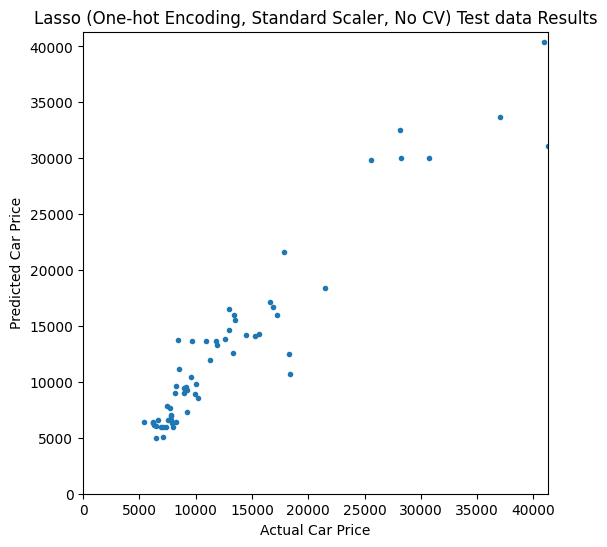

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

lasso = Lasso(alpha=1.0, max_iter=10000)
trainingset = X_train_ohc.copy()
testset = X_test_ohc.copy()
stdsc = StandardScaler()
trainingset[float_columns] = stdsc.fit_transform(trainingset[float_columns])
testset[float_columns] = stdsc.transform(testset[float_columns])
lasso.fit(trainingset, y_train_ohc)
predictions = lasso.predict(testset)


f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test_ohc.to_numpy(), predictions, marker='o', ls='', ms=3.0)

lim = (0, y_test_ohc.max())

ax.set(xlabel='Actual Car Price', 
       ylabel='Predicted Car Price', 
       xlim=lim,
       ylim=lim,
       title='Lasso (One-hot Encoding, Standard Scaler, No CV) Test data Results');

## 실행 과정
- 1. Data preprocessing: 자동차의 가격에 아무 영향이 없을 것이 확실한 car_ID의 경우 column을 삭제한다. CarName(자동차 이름)에는 너무 많은 카테고리가 존재하고 자동차의 가격에 큰 영향이 없을 것으로 판단되었다. 해당 column의 첫 단어는 자동차 브랜드임을 파악하였고, 자동차 브랜드의 경우 자동차 가격에 약간의 영향이 있을 수 있다고 판단해서 모든 문자열에서 첫 번째 단어만 parsing해서 BrandName 이라는 새로운 column에 저장하고, CarName column은 삭제했다.
- 2. One-hot Encoding: 데이터 중에서 type이 object type, 즉 String인 column들을 골라낸다. 이 데이터에 One-hot encoding을 실행하여 학습에 원활히 사용할 수 있도록 조치한다. One-hot encoding이 성능에 미치는 결과를 비교분석하기 위해 One-hot encoding을 실행한 데이터와 실행하지 않고 categorical feature column을 모두 삭제한 데이터를 따로 준비한다.
- 3. Data split: Training에 사용할 데이터와 test에서만 사용할 데이터를 7:3의 비율로 분리한다. 학습 시 train data만을 사용하여 학습을 진행하며, 이후 학습 결과에 대한 평가를 할 때 test data를 사용한다. 
- 4. Loss function: Loss로 RMSE를 선택하고, 각 모델에 대해서 loss 값을 구한다.
- 5. Scaling: float형의 column들을 골라 그 column들에 scaling을 실행한다. 이때 사용하는 scaler로는 StandardScaler(), MinMaxScaler(), MaxAbsScaler()가 있다. 인코딩이 된 데이터에 linearRegression을 실행하는 경우와 인코딩이 되지 않은 데이터에 linearRegression을 실행하는 경우 각각에 세 가지 Scaler들을 추가로 적용하여 본다. 이를 통해 각 데이터들에 Scaler를 적용하지 않은 경우, StandardScaler를 적용한 경우, MinMaxScaler를 적용한 경우, MaxAbsScaler를 적용한 경우에 대한 결과를 얻어 비교분석할 수 있다.
- 6. Model selection: Linear regression 모델과 Lasso 모델을 선택한다. Lasso 모델의 경우 cross validation을 LOOCV로 적용한 모델, LassoCV() 모델의 k-fold 기본값인 5-fold 모델, cross validation이 적용되지 않는 기본 Lasso() 모델 세가지를 선택한다. Linear regression 모델과 각 Lasso 모델의 실행 시간 및 loss 값을 비교하고 분석한다.


## 분석 및 Reasoning
- 1. 실행 결과: 최종적으로 얻을 수 있는 결과는 다음과 같다. LinearRegression과 LassoRegression 중 어느 것을 사용했는지, 데이터에 One-hot encoding을 실행했는지, Scaler를 사용했는지 사용했다면 어떤 Scaler를 사용했는지에 따라 통해 총 32가지의 실행 결과를 도출하였다. 추가로 알고리즘들에 대한 더 깊은 이해를 위해, Scaler를 사용하지 않은 경우 각 알고리즘이 어느 정도의 수행 시간을 내는지에 대해 간단히 측정하여 보았다.
- 2. Encoding: 인코딩을 했는지 안했는지는 성능에 유의미한 차이를 가져왔다. 모든 수행 결과에서, 인코딩을 수행한 쪽이 인코딩을 수행하지 않은 쪽에 비해 더 나은 성능을 가져왔다. 인코딩을 통해 String type의 정보들을 학습에 사용할 수 있게 가공하여 학습에 활용하였으므로 최종적인 예측 성능 결과가 더 좋게 나왔다.
- 3. Scaler: Scaler의 경우, Linear Regression에서는 성능의 차이를 관측하기 힘들다. Lasso Regression에서는 Linear Regression에 비해 Scaler에 따른 성능 차이 관측이 쉽긴 하지만, 그 차이가 크게 유의미하지 않다. 관측 결과, 다른 요인들이 같다고 했을 때 StandardScaler를 사용했을 때 가장 좋은 성능을 내는 것을 확인할 수 있다.
- 4. Lasso의 K-fold 값에 따른 성능 변화: LOOCV를 적용한 LassoCV 모델, 5-fold cv를 적용한 LassoCV 모델, cross validation을 적용하지 않은 Lasso 모델에 대해서, 모든 실험 결과에서 loss 값에 차이는 없었다. 딱 한가지 경우, categorical feature를 제거한 데이터에 대해 5-fold를 적용한 LassoCV 모델과 나머지 모델에서 결과값에 차이가 나타났으나, 이 또한 유의미한 차이는 아니었다.
- 5. 수행 시간에 대한 분석: 먼저, categorical feature를 제거한 데이터와 one-hot encoding을 적용한 데이터를 동일한 모델에 training을 할 때, 수행 시간에 차이가 있음을 확인할 수 있다. one-hot encoding된 데이터의 경우 그렇지 않은 데이터에 비해 feature column의 개수가 category의 개수만큼 늘어나기 때문이다. Linear regression 모델의 경우 1.4배 정도로 작은 증가폭을 보였으나, Lasso 모델의 경우 K-fold 값에 따라 10~50배의 수행시간 차이를 보였다. 다음으로, one-hot encoding된 데이터에 대해서, Linear regression 모델의 수행시간이 모든 Lasso 모델의 수행시간보다 적음을 확인할 수 있었다. 이는 일반적으로 Lasso의 수행시간이 길다는 사실과 일치한다. 또한, 각 Lasso 모델의 K-fold 값에 대해서 수행시간을 분석할 수 있었다. Cross validation을 하지 않는 모델의 경우 약 0.01초, 5-fold 모델의 경우 약 0.2초, LOOCV 모델의 경우 6.3초의 수행시간을 보였다. LOOCV의 경우 데이터의 사이즈를 고려하면 약 140-fold가 되었음을 알 수 있다. Cross validation의 fold 횟수에 linear하게 증가하는 양상을 보였다. 
- 6. Best Model: 수행 시간까지 모두 고려해 보았을 때, 성능이 가장 좋으면서도 수행시간이 적은 모델이 가장 좋다고 판단할 수 있다. Categorical feature에 대해 one-hot encoding을 수행하고 Standard scaler을 적용한 데이터를 Cross validation을 하지 않는 기본 Lasso 모델에 대해 training 하는 경우가 가장 좋다고 판단된다.
